# Interação e Concorrência
## Trabalho Prático - Grupo 13


Grupo:
- André Morandi A86912
- Ivo Lima A90214


In [74]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

# import visualization tools
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton

import matplotlib.pyplot as plt
%matplotlib inline

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

Sabendo que o número do nosso grupo é $N$ = $13$

Temos de de usar um $\textit{quantum algorithm}$ para encontrar $s$ numa lista não ordenada, tal que

$$ s = N \space mod \space 8 $$

In [75]:
N = 13
s = N % 8
s

5

Passando o valor de $s$ para binário, ficamos com:

In [76]:
w = bin(s)[2:]
w # winner

'101'

Portanto, como $5$ em binário é $101$, iremos precisar de preparar um circuito quântico de 3 qubits

In [77]:
x = 3
print('Número de qubits: ', x)

Número de qubits:  3


In [78]:
qr_x      = QuantumRegister(x, 'x')
cr        = ClassicalRegister(x, 'cr')
qc_Grover = QuantumCircuit(qr_x,cr) # circuito quântico

Portanto, iremos inicializar o estado $s$. Para tal criamos a seguinte função:

In [79]:
def init(qc_Grover):
    qc_Grover.h(0)
    qc_Grover.h(1)
    qc_Grover.h(2)

### Implementação do Oracle

Para computar um $\textbf{quantum algorithm}$ baseado em um determinada função, podemos implementar uma espécie de $\textit{black box}$ da função. Passamos um $input$ $x$ e recebemos um $output$ $f(x)$.


Para resolver os problemas, podemos definir o oráculo da seguinte forma: marcaremos nossa solução (ou soluções) com uma fase negativa ($-1$). Desta forma, podemos usar o $\textbf{Grover's algorithm}$ para resolver.

$$ U_w \lvert x \rangle \Rightarrow x \neq w \rightarrow \lvert x \rangle $$
$$ U_w \lvert x \rangle \Rightarrow x = w \rightarrow -\lvert x \rangle $$ 

Tomando o valor $w$ como sendo $101$ resultará na seguinte matriz:

$$ U_w =  \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & −1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ \end{bmatrix}$$

In [80]:
def func(qc_Grover):
    backend_vector = Aer.get_backend("statevector_simulator")
    result = execute(qc_Grover, backend_vector).result()
    qstate = result.get_statevector(qc_Grover)
    print(qstate)



def phase_oracle(qc_Grover, qr_x):
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.ccx(qr_x[0], qr_x[1], qr_x[2])
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])

---------------------------------------------------------------------------------
De acordo com o que foi nos explicado durante as aulas da UC, a superposição colapsaria, sendo a probabilidade de cada uma das bases $\frac{1}{N} = \frac{1}{2^n}$ e o nossas chances de encontrar o valor $w$, $\textit{à priori}$, seria de $1$ em $2^n$.

O computador quântico utiliza a amplificação de amplitude para que possa aumentar a probabilidade. Este processo amplifica a amplitude do $w$ enquanto diminiu a dos outros.

![title](grover_step1.jpg)


Aplica-se a reflexão do oráculo ao estado $s$. Esta transformação significa que a amplitude média à frente do estado de $w$ tornar-se-á negativa (foi diminuída). 

---> IMAGEM







---------------------------------------------------------------------------------

### Diffuser
  
Como mostrado antes, o difusor reflete os estados na média calculada. Isto faz com que a amplitude de $w$ fique bem acima desta média e as outras amplitudes bem abaixo. Portanto, a probabilidade de escolher-se p estado $w$ é muito maior. 

Após várias repetições do oráculo e do difusor com o Grover, a probabilidade de escolher-se o estado $w$ convirgirá para 100%, uma vez que a amplitude continuará sempre a subir. Porém, é normal que nunca atinja, de facto, o máximo sabendo que os outros itens terão uma baixa amplitude. 

In [81]:
def diffuser(qc_Grover,qr_x):
    qc_Grover.h(qr_x[0])
    qc_Grover.barrier(qr_x[1])
    qc_Grover.barrier(qr_x[2])
    qc_Grover.x(qr_x[0])
    qc_Grover.h(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.x(qr_x[1])
    qc_Grover.x(qr_x[2])
    qc_Grover.h(qr_x[2])
    qc_Grover.ccx(qr_x[0], qr_x[1], qr_x[2])
    qc_Grover.x(qr_x[0])
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.h(qr_x[0])
    qc_Grover.h(qr_x[1])
    qc_Grover.x(qr_x[2])
    qc_Grover.h(qr_x[2])

### Implementação Completa em Qiskit

O $qc\_Grover$ vai inicializer o quantum circuit

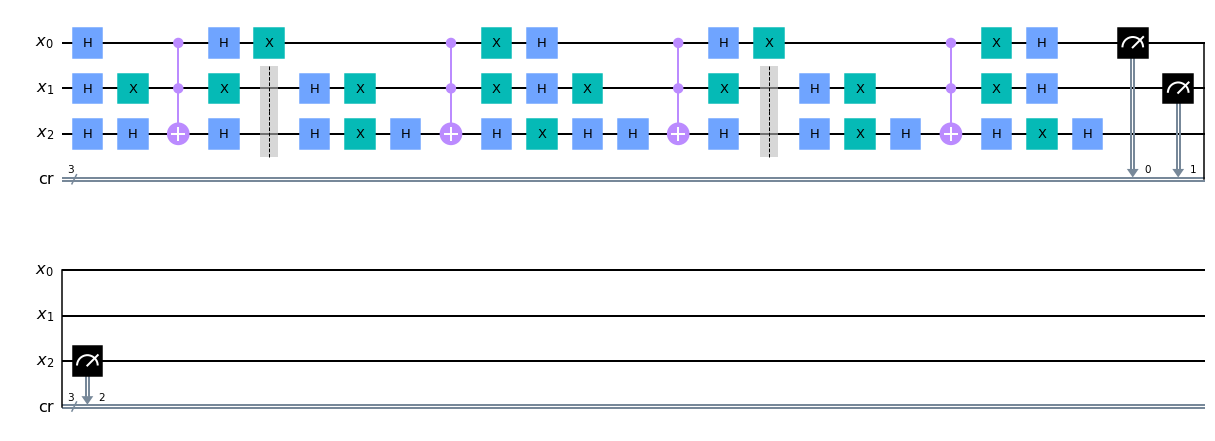

In [109]:
cr        = ClassicalRegister(x,'cr')
qc_Grover = QuantumCircuit(qr_x,cr)

init(qc_Grover)

for t in range(2):
    # phase oracle
    phase_oracle(qc_Grover, qr_x)
    # diffuser
    diffuser(qc_Grover,qr_x)
    
qc_Grover.measure(qr_x,cr)

qc_Grover.draw(output = 'mpl')

Agora iremos correr o circuito num simulador.

In [110]:
backend = Aer.get_backend("qasm_simulator")

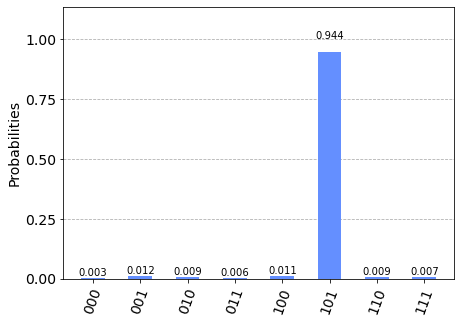

In [112]:
shots=1024
result = execute(qc_Grover, backend, shots=shots).result()
counts_sim = result.get_counts(qc_Grover)
plot_histogram(counts_sim)

In [113]:
qc_Grover.depth()

22

Nota-se que a convergência anda num passo de aproximadamente $\sqrt{N}$. No nosso caso é $\sqrt{5}$ = $2.23606$ = $2$. Por isso temos que o nosso ciclo tem $\textit{range}$ de $2$.

Agora iremos testar o circuito numa máquina quantum de verdade

### Correr num quantum computer

In [86]:
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2021-06-02 15:05:30,477: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [87]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [88]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                  ibmq_belem
-----------                  ----------                  ----------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 16             Pending Jobs: 0             Pending Jobs: 12
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational:  True          Operational:  True
Avg. T1:      170.4          Avg. T1:      77.0          Avg. T1:      70.7
Avg. T2:      66.4           Avg. T2:      72.8          Avg. T2:      78.4



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 24             Pending Jobs: 8              Pending Jobs: 15
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational: 

Escolhemos a '$\textbf{ibmq_santiago}$' devido ao Avgerage $T1$ ($\textit{relaxation time}$) e $T2$ ($\textit{coherence time}$) e também por causa da quantidade de qubits superior ou igual a 3.

In [89]:
backend_device = provider.get_backend('ibmq_santiago')
print("Running on: ", backend_device)

Running on:  ibmq_santiago


In [90]:
# See backend information
backend_device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [91]:
backend_monitor(backend_device)

ibmq_santiago
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 8
    backend_version: 1.3.22
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    backend_name: ibmq_santiago
    memory: True
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    rep_delay_range: [0.0, 500.0]
    meas_lo_range: [[6.952624018e+18, 7.952624018e+18], [6.701014434e+18, 7.701014434e+18], [6.837332258e+18, 7.837332258e+18], [6.901770712e+18, 7.901770712e+18], [6.775814414e+18, 7.775814414e+18]]
    supported_instructions: ['shiftf', 'cx', 'rz', 'play', 'delay', 'u1', 'sx', 'id', 'x', 'measure', 'setf', 'acquire', 'u2', 'u3', 'reset']
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-

In [92]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [93]:
job_r = execute(qc_Grover, backend_device, shots=shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60b790444d4830f2e2534dc0


In [95]:
job_get=backend_device.retrieve_job("60b790444d4830f2e2534dc0")

result_r = job_get.result()
counts_run = result_r.get_counts(qc_Grover)

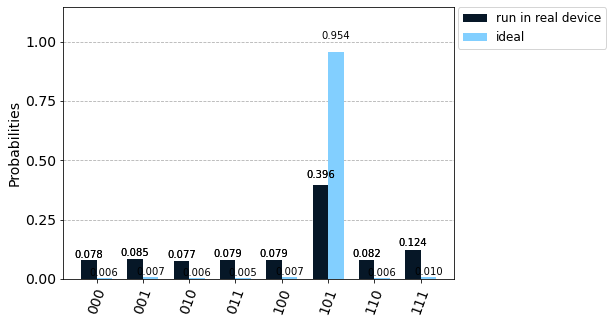

In [96]:
plot_histogram([counts_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

Desta forma, concluímos que há uma maior chance de medir |101⟩. Os outros resultados ocorrem devido aos erros da computação quântica.

### IGNIS

É uma calibração usada para diminuir os erros de medição.

### Calibration Matrix

Como temos 3 qubits, precisamos de um circuito de calibração da ordem $2^3 = 8$

In [42]:
# Generate the calibration circuits
qr = QuantumRegister(x)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [43]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

Num caso idealista onde não existiria barulho/erro, a matriz de calibração seria uma matriz identidade $8x8$. Mas, uma vez que estamos a aplicar num dispositvo quântico real, haverá sempre algum barulho/erro.

In [44]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60b7883fdd5b829f163c1415


In [45]:
job_get=backend_device.retrieve_job("60b7883fdd5b829f163c1415")

cal_results = job_get.result()

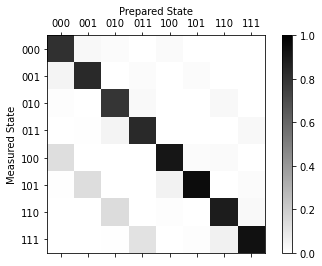

In [46]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

### Análise de Resultados

A $\textit{ average assignment fidelity }$ é o traço da diagonal da matriz anterior. 

In [47]:
# Medida de fidelidade
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.868042


### Calibração

In [48]:
# Filtro
meas_filter = meas_fitter.filter

# Resultados (mitigation)
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

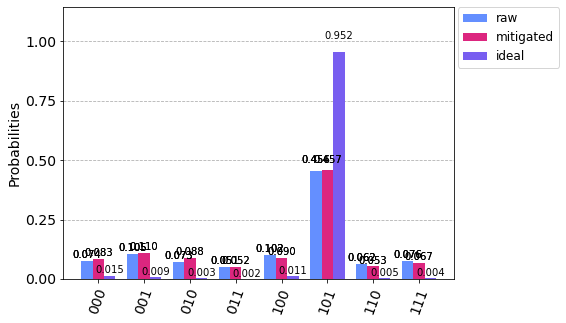

In [49]:
plot_histogram([counts_run, mitigated_counts, counts_sim], legend=['raw', 'mitigated', 'ideal'])

### Conclusão

O algoritmo de Grover é relativamente simples, umas vez que a inserção das primeiras $Hadamard$ $gates$  colocam os qubits numa situação em que o estado das suas fases tem importância. O oráculo muda-as, já o difusor reorganiza-as para que mais tarde possam ser aplicadas novamente as $Hadamard$ $gates$ para assim obter o $w$ esperado. Portanto podemos concluir que somente o oráculo é alterado e o $diffuser$ mantém-se inalterado.

### BIBLIOGRAFIA 

Para a elaboração deste trabalho, consultamos as seguintes páginas da web, para o esclarecimento de dúvidas:

- [Practical Guide](https://towardsdatascience.com/a-practical-guide-to-quantum-amplitude-amplification-dbcbe467044a)
- [Qiskit Documentation](https://qiskit.org/textbook/ch-algorithms/grover.html)
- [IBM Composer](https://quantum-computing.ibm.com/composer/files/2eca069b370b929ecbe89fb0b9b05db9)
- [Grover’s Algorithm](https://averyparkinson23.medium.com/implementing-grovers-algorithm-in-qiskit-b5ddd7dccb2f)